<a href="https://colab.research.google.com/github/DarioMameli/DL_Assignments/blob/main/DL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Firstly let's import all the necessary packages and update them.

Also check the type of runtime environment.

In [31]:
!pip install keras --upgrade --quiet

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import regularizers
import matplotlib.gridspec as gridspec
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

from dl_utils import plot_history

In [33]:
print(tf.__version__)
print(keras.__version__)

2.15.0
3.0.5


In [34]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# Load data

In [35]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


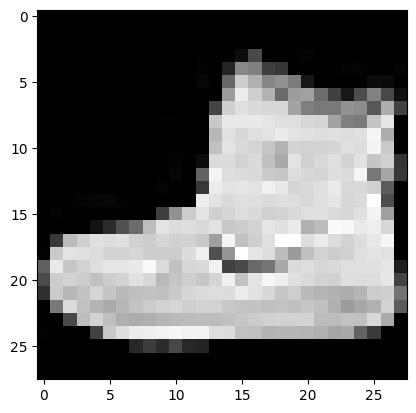

Label = 9


In [36]:
# Show an instance
plt.imshow(X_train[0], cmap="gray")
plt.show()
print("Label =", y_train[0])

In [37]:
# Input data preprocessing
print(np.min(X_train), np.max(X_train))
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

0 255
60000 train samples
10000 test samples


In [38]:
# Labels preprocessing
print(np.min(y_train), np.max(y_train))
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("First label is now = ", y_train[0])

0 9
First label is now =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Build the model
We use a simple fully connected network here using 8 hidden neurons, followed by another layer of 8 hidden neurons, and finally our output layer. We use the ReLU activation function, except for the output, where we apply a softmax activation as we're doing a multiclass classification here.


In [39]:
def MLPModel(num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [40]:
model = MLPModel(num_classes)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │           6,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,442 (25.16 KB)

 Trainable params: 6,442 (25.16 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)
    print(layer.get_config())
    print()

0 flatten
{'name': 'flatten', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}

1 dense
{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 8, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}

2 dense_1
{'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 8, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer

# Training


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3650 - loss: 1.6970 - val_accuracy: 0.7426 - val_loss: 0.7927
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7578 - loss: 0.7282 - val_accuracy: 0.7683 - val_loss: 0.6605
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7798 - loss: 0.6242 - val_accuracy: 0.7763 - val_loss: 0.6285
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7909 - loss: 0.5845 - val_accuracy: 0.7874 - val_loss: 0.5882
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8047 - loss: 0.5469 - val_accuracy: 0.7979 - val_loss: 0.5745


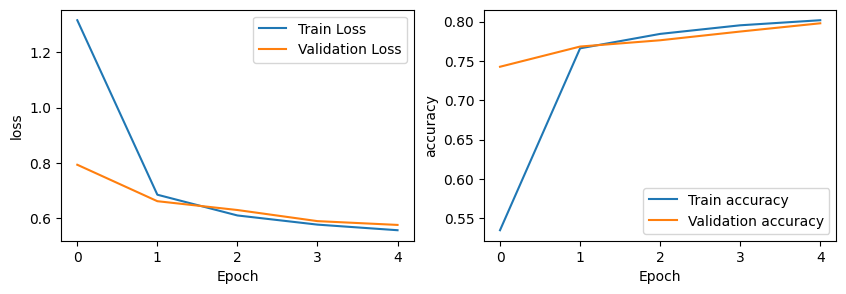

In [42]:
batch_size = 128
epochs = 5

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
plot_history(history)

In [43]:
print(model.layers[1].get_weights()[0].shape)  # weights
print(model.layers[1].get_weights()[1].shape)  # bias

(784, 8)
(8,)


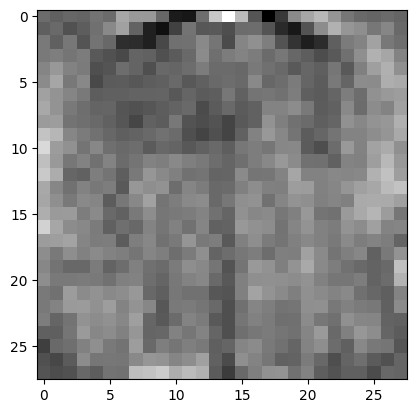

In [44]:
# Visualizing weights of first dense layer
rs = model.layers[1].get_weights()[0][:, 0].reshape(28, 28)
plt.imshow(rs, cmap="gray")
plt.show()

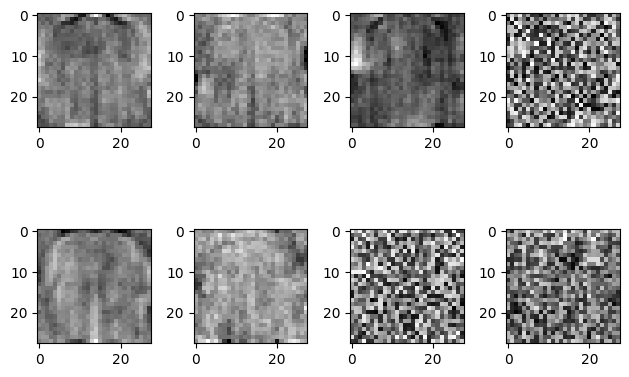

In [45]:
# Show all 8 weights of the first dense layer
gs = gridspec.GridSpec(2, 4)
for n in range(8):
    rs = model.layers[1].get_weights()[0][:, n].reshape(28, 28)
    ax = plt.subplot(gs[n])
    ax.imshow(rs, cmap="gray")
plt.tight_layout()
plt.show()

# Evaluation

In [46]:
score = model.evaluate(X_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5750592350959778
Test accuracy: 0.7979000210762024


In [47]:
scores = model.predict(np.array([X_train[0]]))

print(scores)
print("Predicted label = ", np.argmax(scores))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
[[3.51286067e-09 2.03969279e-07 2.22479990e-08 1.07786476e-14
  3.77668452e-10 5.89428528e-04 2.46092462e-08 6.14803704e-03
  1.40776741e-03 9.91854548e-01]]
Predicted label =  9
